In [3]:
import re

def parse_file(file_path):
    def extract_time_and_memory(content):
        # Regular expression for time and memory usage
        time_memory_pattern = re.compile(r'takes ([\d.]+) seconds\n\((\d+), (\d+)\)')
        matches = time_memory_pattern.findall(content)
        return [{'Time (seconds)': float(time), 'Memory Usage 1 (bytes)': int(mem1), 'Memory Usage 2 (bytes)': int(mem2)} for time, mem1, mem2 in matches]

    # Reading the file content
    with open(file_path, 'r') as file:
        content = file.readlines()

    # Splitting the content into separate experiments
    experiment_sets = []
    current_experiment = []
    for line in content:
        if line.startswith("Now doing ICP"):
            if current_experiment:
                experiment_sets.append(current_experiment)
                current_experiment = []
        else:
            current_experiment.append(line)

    # Adding the last experiment if it exists
    if current_experiment:
        experiment_sets.append(current_experiment)

    # Parsing each experiment set
    parsed_experiments = []
    for experiment in experiment_sets:
        parsed_data = extract_time_and_memory(''.join(experiment))
        parsed_experiments.append(parsed_data)

    return parsed_experiments


In [4]:
import numpy as np
import matplotlib.pyplot as plt

results = parse_file('memory.txt')

columns = ['optimize-random', 'quaternion-random', 'svd-random', 'optimize-voxel', 'quaternion-voxel', 'svd-voxel']


total_times = []
total_memories = []

for i, result in enumerate(results):
    times = []
    peak_memories = []
    for entry in result:
        times.append(entry['Time (seconds)'])
        peak_memories.append(entry['Memory Usage 2 (bytes)'] / (1024 * 1024))
    # print(columns[i], times, peak_memories)
    total_times.append(times)
    total_memories.append(peak_memories)

total_times = np.array(total_times)
total_memories = np.array(total_memories)

total_memories




array([[  183.99709034,   410.78253174,   448.05070591,   493.19325638,
          537.87987995,   583.63061619,   658.04941177,   737.74729919,
          820.47427654],
       [  820.47427654,   820.47427654,   820.47427654,   820.47427654,
          820.47427654,   820.47427654,   820.47427654,   847.32686043,
          930.9852562 ],
       [12657.63783836, 13288.09345913, 13288.09345913, 13288.09345913,
        13863.73470592, 13863.73470592, 14721.84862804, 14721.84862804,
        17214.61395454],
       [17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        17214.61395454],
       [17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        17214.61395454],
       [17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        17214.61395454, 17214.61395454, 17214.61395454, 17214.61395454,
        172

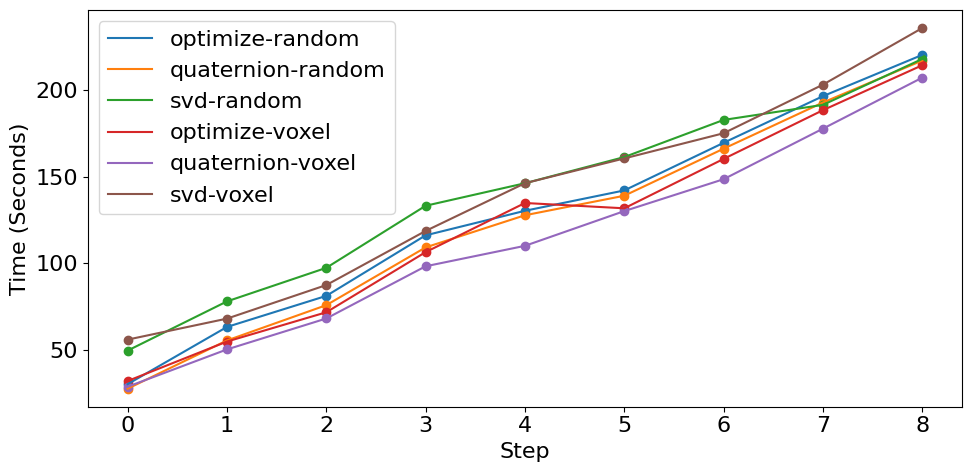

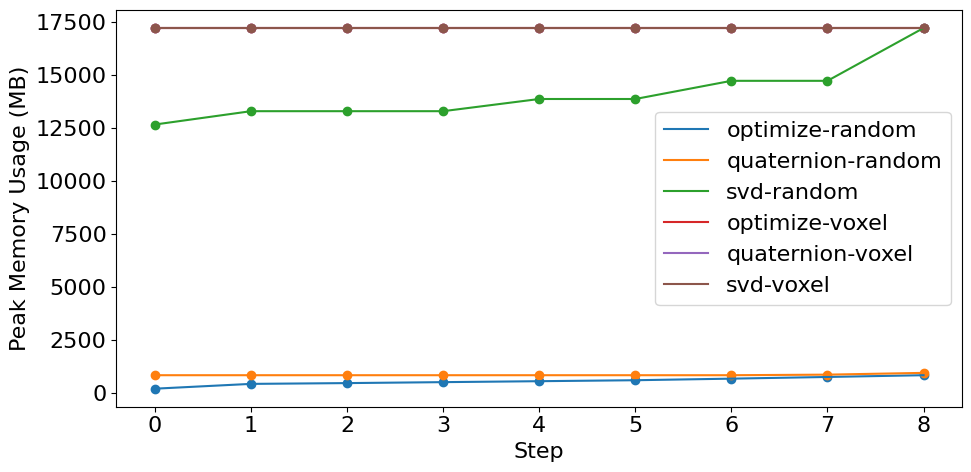

In [7]:

plt.rcParams.update({'font.size': 16})

x = np.arange(9)  
plt.figure(figsize=(10, 5))
for i in range(len(columns)):
    plt.plot(x, total_times[i], label=columns[i])
    plt.scatter(x, total_times[i])
    plt.legend()
plt.xlabel('Step')
plt.ylabel('Time (Seconds)')
plt.tight_layout()
plt.savefig('plot/time.png', dpi=300)


plt.figure(figsize=(10, 5))
for i in range(len(columns)):
    plt.plot(x, total_memories[i], label=columns[i])
    plt.scatter(x, total_memories[i])
    plt.legend()
plt.xlabel('Step')
plt.ylabel('Peak Memory Usage (MB)')
plt.tight_layout()
plt.savefig('plot/memory.png', dpi=300)
